## zomato restaurant data analysis

## 1, data cleaning

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('zomato data.csv')

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [30]:
df.values

array([['Jalsa', 'Yes', 'Yes', ..., 775, 800, 'Buffet'],
       ['Spice Elephant', 'Yes', 'No', ..., 787, 800, 'Buffet'],
       ['San Churro Cafe', 'Yes', 'No', ..., 918, 800, 'Buffet'],
       ...,
       ['Anna Kuteera', 'Yes', 'No', ..., 771, 450, 'Dining'],
       ['Darbar', 'No', 'No', ..., 98, 800, 'Dining'],
       ['Vijayalakshmi', 'Yes', 'No', ..., 47, 200, 'Dining']],
      dtype=object)

In [31]:
df.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [32]:
df['rate'] = df['rate'].astype(str).str.replace('/5','',regex=False).replace('nan',None).astype(float)

df['approx_cost(for two people)'] = df['approx_cost(for two people)'].astype(str).str.replace(',','',regex=True).replace('nan',None).astype(float)

print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                        800.0          Buffet  
1                        800.0          Buffet  
2                        800.0          Buffet  
3                        300.0          Buffet  
4                        600.0          Buffet  


## 2. data exploration

In [33]:
# generate summarry statistics for numerical columns
summary_status = df.describe()
print("summary statistics:\n",summary_status)

summary statistics:
              rate        votes  approx_cost(for two people)
count  148.000000   148.000000                   148.000000
mean     3.633108   264.810811                   418.243243
std      0.402271   653.676951                   223.085098
min      2.600000     0.000000                   100.000000
25%      3.300000     6.750000                   200.000000
50%      3.700000    43.500000                   400.000000
75%      3.900000   221.750000                   600.000000
max      4.600000  4884.000000                   950.000000


In [34]:
# Count the frequency of each restaurant type
category_frequency = df['listed_in(type)'].value_counts()
print("\nCategory Frequency:\n", category_frequency)



Category Frequency:
 listed_in(type)
Dining    110
Cafes      23
other       8
Buffet      7
Name: count, dtype: int64


In [35]:
# Calculate correlation between 'rate' and 'votes'
correlation_rate_votes = df[['rate', 'votes']].corr().iloc[0, 1]
print("\nCorrelation between 'Rate' and 'Votes':", correlation_rate_votes)



Correlation between 'Rate' and 'Votes': 0.48984428790988843


In [36]:
# Average cost per type of restaurant
avg_cost_per_category = df.groupby('listed_in(type)')['approx_cost(for two people)'].mean()
print("\nAverage Cost Per Category:\n", avg_cost_per_category)



Average Cost Per Category:
 listed_in(type)
Buffet    671.428571
Cafes     545.652174
Dining    357.272727
other     668.750000
Name: approx_cost(for two people), dtype: float64


## data visualization 

C:\Users\HP\AppData\Local\Temp\ipykernel_11244\1416049181.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_frequency.values, y=category_frequency.index, palette='viridis')


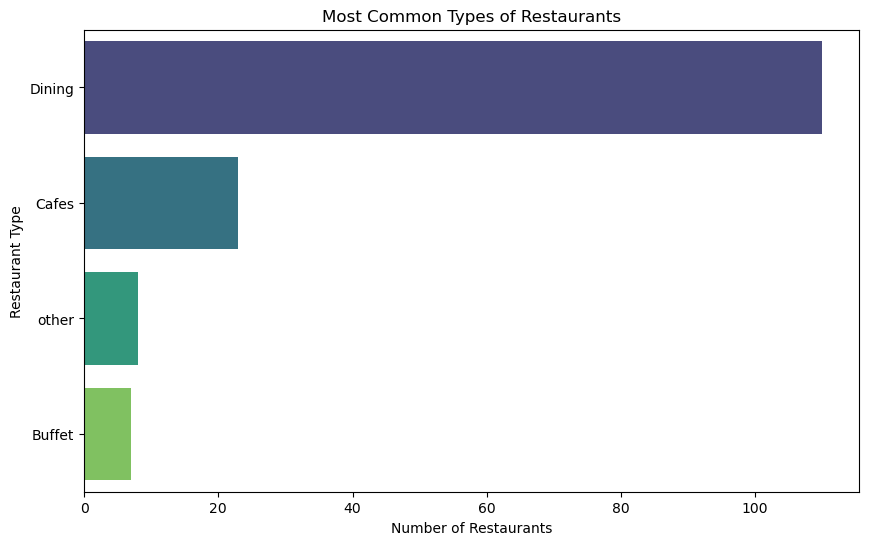

In [37]:
##1.	Bar Plot for Common Types of Restaurants:


import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot for the most common restaurant categories
plt.figure(figsize=(10, 6))
sns.barplot(x=category_frequency.values, y=category_frequency.index, palette='viridis')
plt.title('Most Common Types of Restaurants')
plt.xlabel('Number of Restaurants')
plt.ylabel('Restaurant Type')
plt.show()


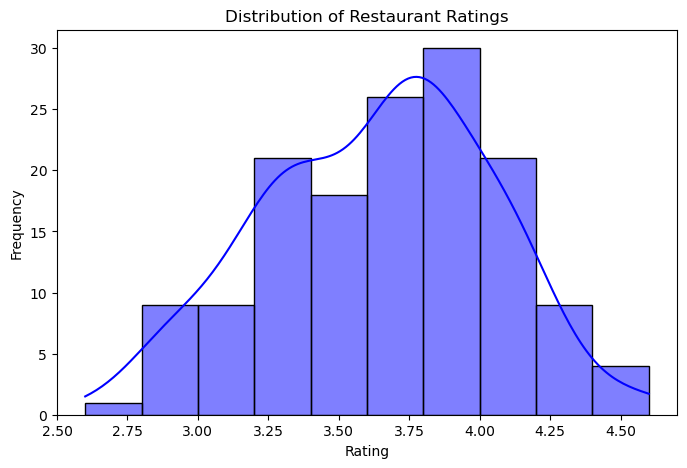

In [38]:
## 2.	Histogram for Rating Distribution:


# Histogram for the distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rate'].dropna(), bins=10, kde=True, color='blue')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


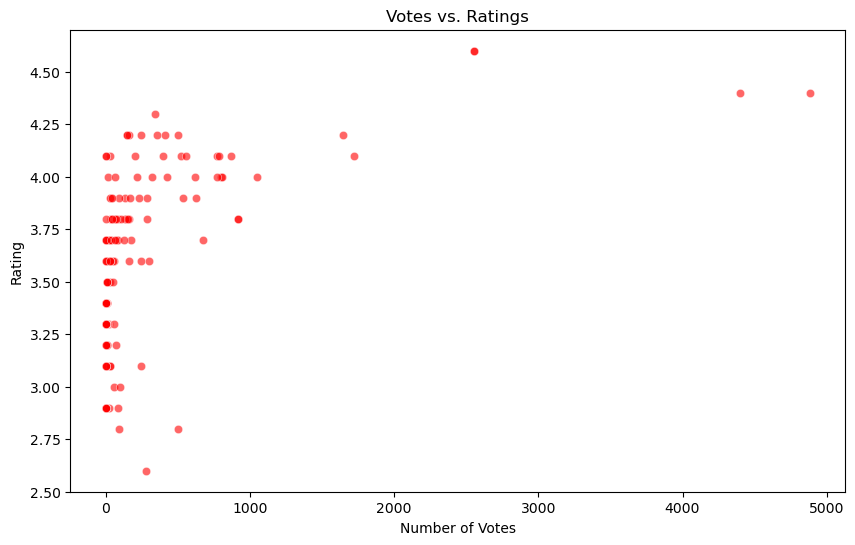

In [39]:
## 3.	Scatter Plot for Votes vs. Ratings:


# Scatter plot for the relationship between votes and ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='votes', y='rate', data=df, alpha=0.6, color='red')
plt.title('Votes vs. Ratings')
plt.xlabel('Number of Votes')
plt.ylabel('Rating')
plt.show()


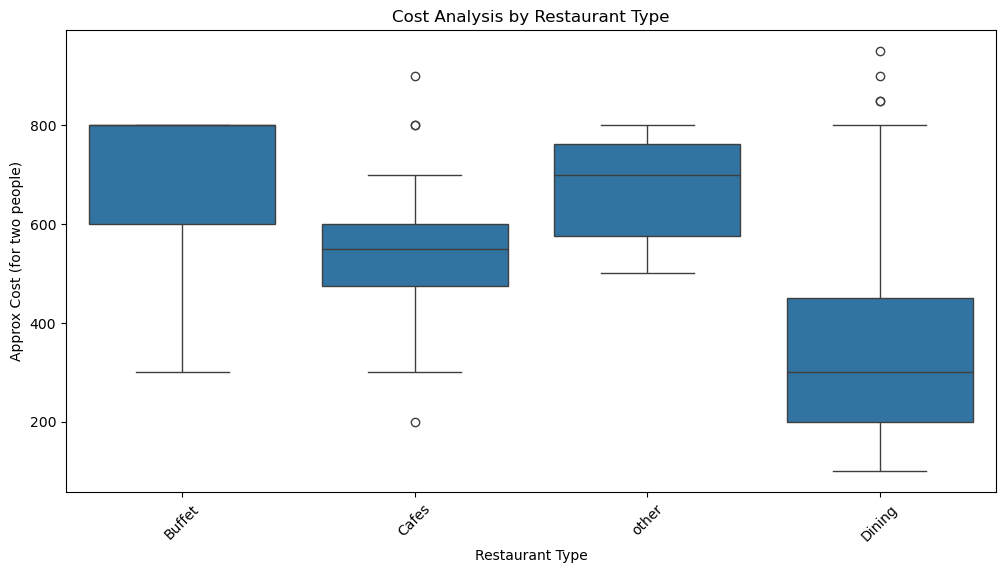

In [40]:
## 4.	Box Plot for Cost Analysis by Type:


# Box plot for cost analysis by restaurant type
plt.figure(figsize=(12, 6))
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=df)
plt.xticks(rotation=45)
plt.title('Cost Analysis by Restaurant Type')
plt.xlabel('Restaurant Type')
plt.ylabel('Approx Cost (for two people)')
plt.show()


Customer segmentation analysis involves dividing customers into groups based on shared characteristics to better understand their behavior and target them more effectively. In this dataset, we can analyze restaurant data to identify potential segments based on ratings, average cost, and other factors.
Customer Segmentation Analysis Plan

1.	Segmentation Based on Rating:

o	Group restaurants into segments based on their average ratings (e.g., low, medium, high).

3.	Segmentation by Cost:

o	Classify restaurants into segments based on their cost (e.g., budget, mid-range, premium).

5.	Combination of Rating and Cost:

o	Create a matrix that segments restaurants by a combination of their rating and average cost.

7.	Online Order and Table Booking Segmentation:

o	Identify if there are segments where restaurants that offer online orders and table bookings show higher ratings or different average costs.


In [41]:
## 1. Segmentation Based on Rating


# Define rating segments
def rating_segment(rate):
    if rate < 3.5:
        return 'Low'
    elif 3.5 <= rate < 4.0:
        return 'Medium'
    else:
        return 'High'

df['rating_segment'] = df['rate'].apply(rating_segment)

# Count the number of restaurants in each rating segment
rating_segment_counts = df['rating_segment'].value_counts()
print("\nRating Segments:\n", rating_segment_counts)



Rating Segments:
 rating_segment
Medium    62
Low       52
High      34
Name: count, dtype: int64


In [42]:
## 2. Segmentation by Cost


# Define cost segments
def cost_segment(cost):
    if cost < 500:
        return 'Budget'
    elif 500 <= cost < 1000:
        return 'Mid-Range'
    else:
        return 'Premium'

df['cost_segment'] = df['approx_cost(for two people)'].apply(cost_segment)

# Count the number of restaurants in each cost segment
cost_segment_counts = df['cost_segment'].value_counts()
print("\nCost Segments:\n", cost_segment_counts)



Cost Segments:
 cost_segment
Budget       91
Mid-Range    57
Name: count, dtype: int64


In [43]:
## 3. Combination of Rating and Cost


# Create a combination of rating and cost segments
df['rating_cost_segment'] = df['rating_segment'] + ' & ' + df['cost_segment']

# Count the number of restaurants in each combined segment
rating_cost_segment_counts = df['rating_cost_segment'].value_counts()
print("\nCombined Rating and Cost Segments:\n", rating_cost_segment_counts)



Combined Rating and Cost Segments:
 rating_cost_segment
Low & Budget          41
Medium & Budget       35
Medium & Mid-Range    27
High & Mid-Range      19
High & Budget         15
Low & Mid-Range       11
Name: count, dtype: int64


In [44]:
## 4. Online Order and Table Booking Segmentation


# Group by online order and table booking to see average ratings and cost
online_order_analysis = df.groupby('online_order')['rate', 'approx_cost(for two people)'].mean()
table_booking_analysis = df.groupby('book_table')['rate', 'approx_cost(for two people)'].mean()

print("\nOnline Order Analysis:\n", online_order_analysis)
print("\nTable Booking Analysis:\n", table_booking_analysis)


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

C:\Users\HP\AppData\Local\Temp\ipykernel_11244\2789831682.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating_segment', data=df, palette='coolwarm')


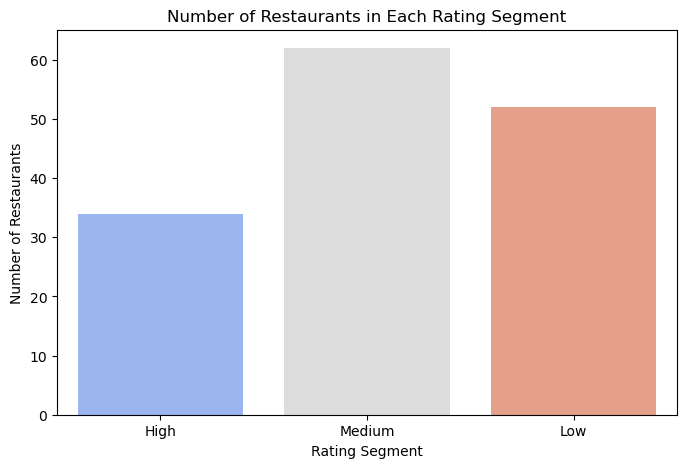

In [45]:
## 1. Bar Plot for Rating Segments:


# Bar plot for rating segments
plt.figure(figsize=(8, 5))
sns.countplot(x='rating_segment', data=df, palette='coolwarm')
plt.title('Number of Restaurants in Each Rating Segment')
plt.xlabel('Rating Segment')
plt.ylabel('Number of Restaurants')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11244\1236902301.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cost_segment', data=df, palette='pastel')


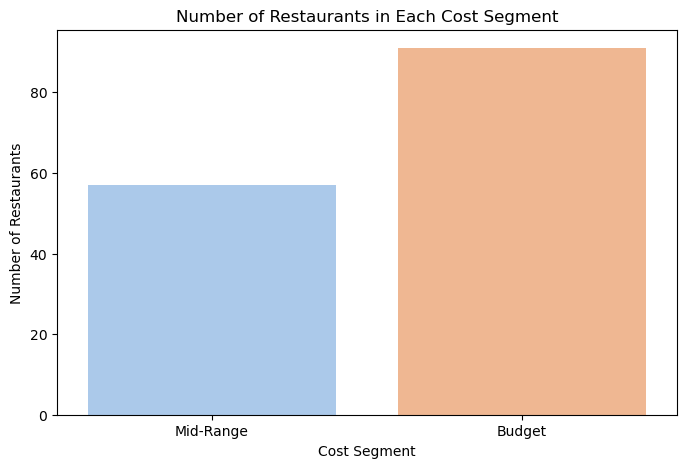

In [46]:
## 2. Bar Plot for Cost Segments:


# Bar plot for cost segments
plt.figure(figsize=(8, 5))
sns.countplot(x='cost_segment', data=df, palette='pastel')
plt.title('Number of Restaurants in Each Cost Segment')
plt.xlabel('Cost Segment')
plt.ylabel('Number of Restaurants')
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_11244\2059428946.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='rating_cost_segment', data=df, palette='Set2', order=df['rating_cost_segment'].value_counts().index)


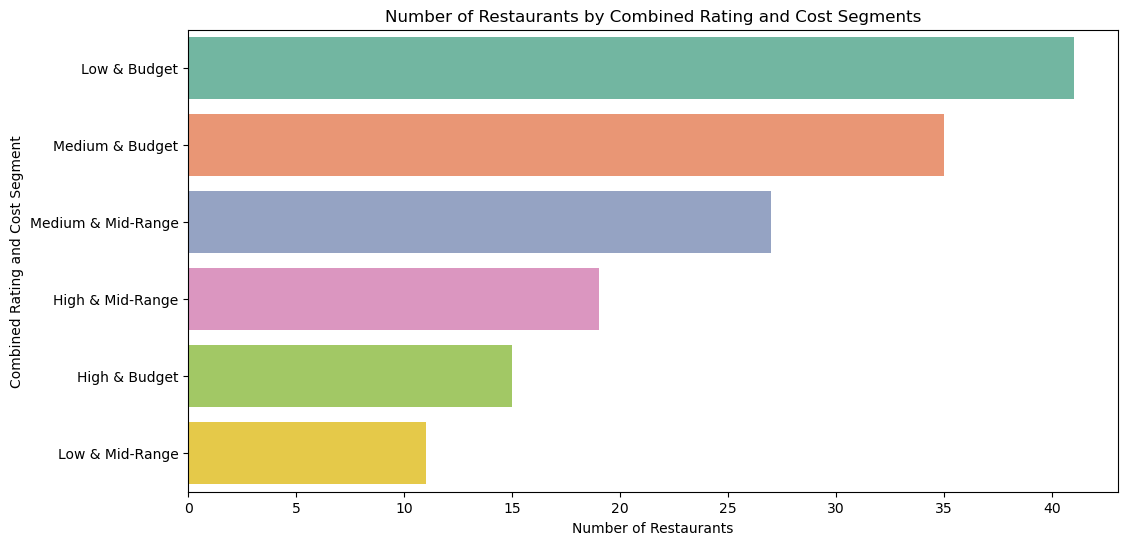

In [47]:
## 3. Bar Plot for Combined Rating and Cost Segments:


# Bar plot for combined rating and cost segments
plt.figure(figsize=(12, 6))
sns.countplot(y='rating_cost_segment', data=df, palette='Set2', order=df['rating_cost_segment'].value_counts().index)
plt.title('Number of Restaurants by Combined Rating and Cost Segments')
plt.xlabel('Number of Restaurants')
plt.ylabel('Combined Rating and Cost Segment')
plt.show()


ValueError: Cannot subset columns with a tuple with more than one element. Use a list instead.

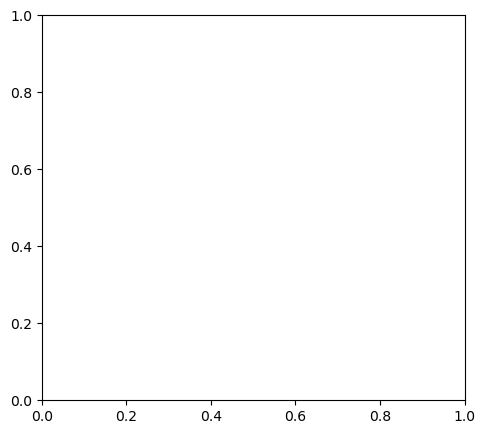

In [48]:
## 4. Bar Plots for Online Order and Table Booking Analysis:

# Visualizing average ratings and costs for online order and table booking segments
plt.figure(figsize=(12, 5))

# Average rating and cost for online order
plt.subplot(1, 2, 1)
online_order_avg = df.groupby('online_order')['rate', 'approx_cost(for two people)'].mean().reset_index()
sns.barplot(x='online_order', y='rate', data=online_order_avg, palette='Blues_d')
plt.title('Average Rating for Online Order Option')
plt.xlabel('Online Order')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
sns.barplot(x='online_order', y='approx_cost(for two people)', data=online_order_avg, palette='Blues_d')
plt.title('Average Cost for Online Order Option')
plt.xlabel('Online Order')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()

# Repeat for table booking
plt.figure(figsize=(12, 5))

# Average rating and cost for table booking
plt.subplot(1, 2, 1)
table_booking_avg = df.groupby('book_table')['rate', 'approx_cost(for two people)'].mean().reset_index()
sns.barplot(x='book_table', y='rate', data=table_booking_avg, palette='Greens_d')
plt.title('Average Rating for Table Booking Option')
plt.xlabel('Table Booking')
plt.ylabel('Average Rating')

plt.subplot(1, 2, 2)
sns.barplot(x='book_table', y='approx_cost(for two people)', data=table_booking_avg, palette='Greens_d')
plt.title('Average Cost for Table Booking Option')
plt.xlabel('Table Booking')
plt.ylabel('Average Cost')

plt.tight_layout()
plt.show()


Explanation:
•	The bar plots for rating and cost segments show the distribution of restaurants based on ratings and cost.
•	The combined segment bar plot shows how many restaurants fall into each combination of rating and cost categories.
•	The online order and table booking plots show the average ratings and costs for restaurants that offer these services compared to those that don't.
These visualizations will help you see the distribution of segments and how they relate to restaurant characteristic


## feature analysis

In [49]:
## Step 1: Feature Engineering

# Binary columns for online_order and book_table
df['online_order_binary'] = df['online_order'].apply(lambda x: 1 if x == 'Yes' else 0)
df['book_table_binary'] = df['book_table'].apply(lambda x: 1 if x == 'Yes' else 0)

# Price categories
def categorize_price(cost):
    if cost < 300:
        return 'Low'
    elif 300 <= cost < 700:
        return 'Medium'
    else:
        return 'High'

df['price_category'] = df['approx_cost(for two people)'].apply(categorize_price)

# Rating categories
def categorize_rating(rate):
    if rate < 3:
        return 'Low'
    elif 3 <= rate < 4:
        return 'Average'
    elif 4 <= rate < 4.5:
        return 'Good'
    else:
        return 'Excellent'

df['rating_category'] = df['rate'].apply(categorize_rating)

# Interaction term: popularity_score
df['popularity_score'] = df['votes'] * df['rate']


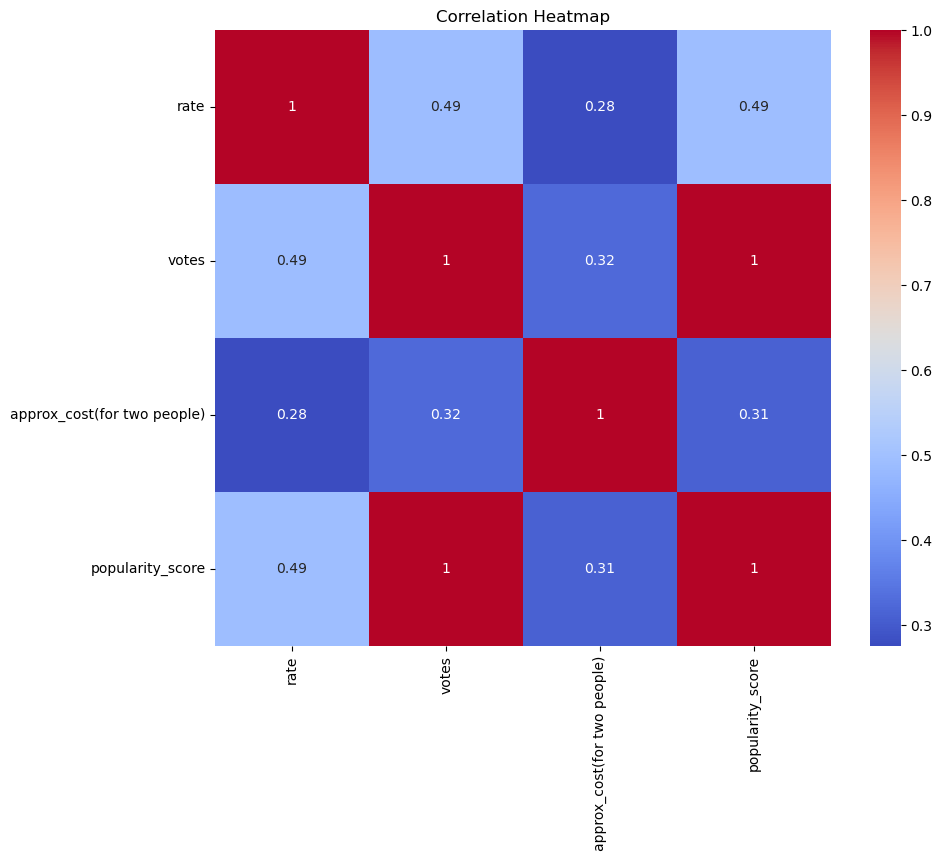

In [50]:
## Step 2: Advanced Analysis Functions
## Correlation Heatmap
import seaborn as sns
import matplotlib.pyplot as plt

df['popularity_score'] = df['votes'] * df['rate']
# Calculate correlations
correlation_matrix = df[['rate', 'votes', 'approx_cost(for two people)', 'popularity_score']].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title("Correlation Heatmap")
plt.show()


In [52]:
## Group Analysis

# Group by type and calculate average rating and cost
group_analysis = df.groupby('listed_in(type)').agg({
    'rate': 'mean',
    'approx_cost(for two people)': 'mean',
    'votes': 'sum'
}).reset_index()

# Display the group analysis
print(group_analysis)


  listed_in(type)      rate  approx_cost(for two people)  votes
0          Buffet  3.842857                   671.428571   3028
1           Cafes  3.765217                   545.652174   6434
2          Dining  3.571818                   357.272727  20363
3           other  3.912500                   668.750000   9367


In [54]:
## Predictive Modeling 
##  predict the price_category based on other features, you can use a simple classification model like logistic regression.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select features and target
X = df[['rate', 'votes', 'online_order_binary', 'book_table_binary']]
y = df['price_category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.60


C:\Users\HP\anaconda3\arshad\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
